In [5]:
#Import

import pandas as pd
import sklearn.datasets
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

import sys

In [6]:
sys.path

['E:\\My Drive\\Cursos\\Python\\Fashion',
 'c:\\users\\henrique\\appdata\\local\\programs\\python\\python37\\python37.zip',
 'c:\\users\\henrique\\appdata\\local\\programs\\python\\python37\\DLLs',
 'c:\\users\\henrique\\appdata\\local\\programs\\python\\python37\\lib',
 'c:\\users\\henrique\\appdata\\local\\programs\\python\\python37',
 '',
 'c:\\users\\henrique\\appdata\\local\\programs\\python\\python37\\lib\\site-packages',
 'c:\\users\\henrique\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\win32',
 'c:\\users\\henrique\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\win32\\lib',
 'c:\\users\\henrique\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\Pythonwin',
 'c:\\users\\henrique\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Henrique\\.ipython']

In [9]:
#Importar o dataset
df = pd.read_csv('bfi.csv')

In [10]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [11]:
df.columns

Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [14]:
df.drop(labels=['gender', 'education', 'age'], axis=1, inplace=True)

In [19]:
df.iloc[:,1:]

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,...,1.0,1.0,1.0,NaN,1.0,6.0,1,6.0,6.0,1.0
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,...,NaN,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,...,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,...,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [21]:
df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

In [26]:
df

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,...,1.0,1.0,1.0,NaN,1.0,6.0,1,6.0,6.0,1.0
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,...,NaN,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,...,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,...,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [27]:
df = df.dropna()

In [23]:
#Factor Analysis

In [28]:
fa = FactorAnalyzer(n_factors=6, rotation='varimax')

In [29]:
fa.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=6, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [32]:
#Get Loadings
loadings = fa.loadings_

In [33]:
#Get Eigenvector and eigenvalues
ev, v = fa.get_eigenvalues()

In [37]:
# Scree plot
xval = range(1, df.shape[1]+1) #df.shape[1] é o número de colunas
xval

range(1, 26)

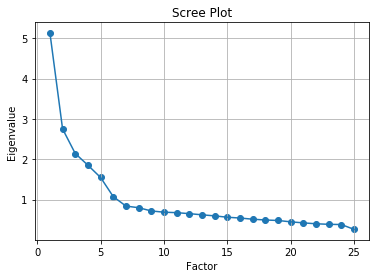

In [43]:
plt.scatter(xval, ev)
plt.plot(xval, ev)

plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()

In [45]:
pd.DataFrame.from_records(loadings)

,0,1,2,3,4,5
0,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
1,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
2,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
3,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
4,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519
5,-0.004358,0.077248,0.554582,0.007511,0.190124,0.095035
6,0.068330,0.038370,0.674545,0.057055,0.087593,0.152775
7,-0.039994,0.031867,0.551164,0.101282,-0.011338,0.008996
8,0.216283,-0.066241,-0.638475,-0.102617,-0.143846,0.318359
9,0.284187,-0.180812,-0.544838,-0.059955,0.025837,0.132423
